In [28]:
with open('tabt_loss.txt', 'r') as file:
    lines = file.readlines()

In [29]:
import re

pattern = r"Epoch (\d+)/(\d+), Loss: (\d+\.\d+), Val Loss: (\d+\.\d+), Val AUC: (\d+\.\d+)"

results = []
for line in lines:
    if line.strip() == "-----":
        break
    match = re.match(pattern, line)
    if match:
        epoch = int(match.group(1))
        loss = float(match.group(3))
        val_loss = float(match.group(4))
        val_auc = float(match.group(5))
        results.append((epoch, loss, val_loss, val_auc))

print(results)

[(1, 0.6888, 5.7714, 0.9657), (2, 5.7709, 0.3591, 0.9577), (3, 0.3478, 0.5461, 0.962), (4, 0.5525, 0.4487, 0.9629), (5, 0.4539, 0.3581, 0.963), (6, 0.3608, 0.2727, 0.965), (7, 0.2709, 0.2093, 0.9695), (8, 0.2062, 0.1961, 0.9745), (9, 0.1935, 0.173, 0.976), (10, 0.1536, 0.161, 0.978), (11, 0.1317, 0.144, 0.9827), (12, 0.114, 0.1449, 0.9841), (13, 0.1131, 0.1422, 0.9842), (14, 0.1076, 0.1279, 0.9842), (15, 0.0942, 0.1234, 0.985)]


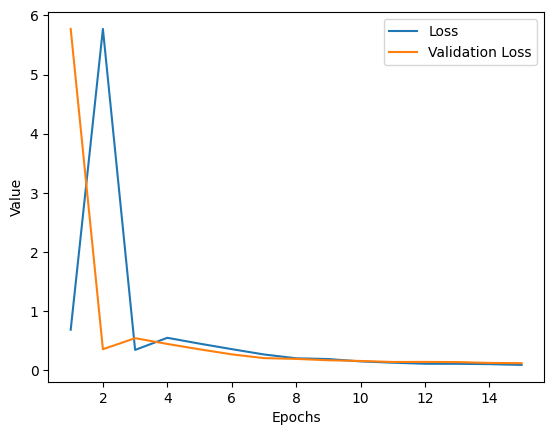

In [30]:
import matplotlib.pyplot as plt

epochs = [result[0] for result in results]
loss = [result[1] for result in results]
val_loss = [result[2] for result in results]

plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [31]:
with open('tabt_preds.txt', 'r') as file:
    lines = file.readlines()

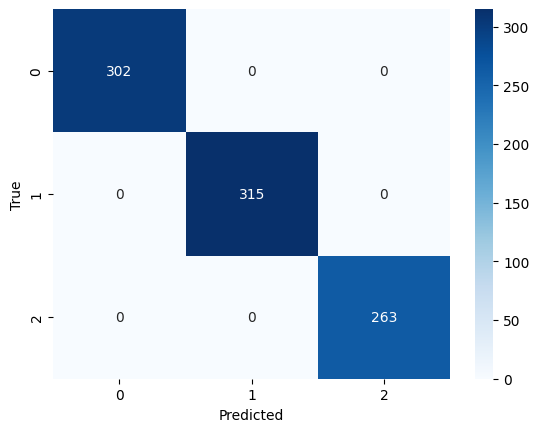

In [32]:
from sklearn.metrics import confusion_matrix

# Read the classifications from the file
classifications = []
for line in lines:
    true_label, predicted_label = line.strip().split(":")
    classifications.append((int(true_label), int(predicted_label)))

# Extract the true labels and predicted labels
true_labels = [true_label for true_label, _ in classifications]
predicted_labels = [predicted_label for _, predicted_label in classifications]

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

import seaborn as sns

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
